# DATA EXPLORATORY ANALYSIS FOR CREDIT CARD

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime,timedelta

In [4]:
ccd = pd.read_excel("D:\\Analytics lab\Python\Case Study\Python Foundation Case Study 2 - Credit Card Case Study\\Credit Card Data.xlsx")


### Q1. a. In case age is less than 18, replace it with mean of age values.

In [6]:
Customer_Acq = pd.read_csv("D:\Analytics lab\Python\Case Study\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")

In [11]:
Customer_Acq.loc[Customer_Acq['Age'] < 18,'Age'] = Customer_Acq['Age'].mean()
Customer_Acq

No Customer   Age        City   Product     Limit Company        Segment
0     1       A1  76.0   BANGALORE      Gold  500000.0      C1  Self Employed
1     2       A2  71.0    CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2     3       A3  34.0      COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3     4       A4  47.0      BOMBAY  Platimum   10001.0      C4           Govt
4     5       A5  56.0   BANGALORE  Platimum   10002.0      C5  Normal Salary
..  ...      ...   ...         ...       ...       ...     ...            ...
95   96      A96  54.0     CHENNAI    Silver  100000.0     C19   Salaried_Pvt
96   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20           Govt
97   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21  Normal Salary
98   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22  Self Employed
99  100     A100  36.0      COCHIN    Silver  100000.0      C5   Salaried_MNC

[100 rows x 8 columns]

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 

In [14]:
Spend_amt = pd.read_csv("D:\Analytics lab\Python\Case Study\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv")
Spend_amt

Sl No: Customer      Month        Type     Amount
0          1       A1  12-Jan-04   JEWELLERY  485470.80
1          2       A1   3-Jan-04       PETRO  410556.13
2          3       A1  15-Jan-04     CLOTHES   23740.46
3          4       A1  25-Jan-04        FOOD  484342.47
4          5       A1  17-Jan-05      CAMERA  369694.07
...      ...      ...        ...         ...        ...
1495    1496      A67   4-Feb-06  BUS TICKET  356872.73
1496    1497      A68  25-Mar-06  BUS TICKET  204971.10
1497    1498      A69  31-Mar-06  BUS TICKET   50449.44
1498    1499      A70  23-Mar-06  BUS TICKET   80593.94
1499    1500      A71  24-Mar-06  BUS TICKET  194447.62

[1500 rows x 5 columns]

In [15]:
#Joining Spend and Customer Acquistion csv files
df1 = pd.merge(left = Customer_Acq, right = Spend_amt, left_on = 'Customer', right_on = 'Customer', how = 'inner', indicator = True)
Cust_limit = 0.50*df1.Limit
df1.loc[df1['Amount']>df1['Limit'],['Amount','Limit']] = Cust_limit
df1

No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum    5000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum    5000.5     C21   
1498   99      A99  35.0    CALCUTTA  Platimum    5001.0     C22   
1499  100     A100  36.0      COCHIN    Silver   50000.0      C5   

            Segment  Sl No:      Month        Type     Amount _merge  
0     Self Employed       1  12-Jan-04   JEWELLERY  485470.80   both  
1     Self Employed       2   3-Jan-04       PETRO  410556.13   both  
2     Self Employed       3  15-Jan-04     CLOTHES   23740.46   both  
3     Self Employed       4  25-Jan-04        FOOD  484342.47   both  
4     Self Employed       5  17-Jan-05      CAMERA  369694.07   both  
...             ...     ...        ...         ...        ...    ...  
1495   Salaried_Pvt      98  25-Jan-04        BIKE   54729.66   both  
1496           Govt      99  12-Jan-04        AUTO    5000.00   both  
1497  Normal Salary     100   3-Jan-04    SHOPPING    5000.50   both  
1498  Self Employed     101  15-Jan-04  AIR TICKET    5001.00   both  
1499   Salaried_MNC     102  25-Jan-04  BUS TICKET   50000.00   both  

[1500 rows x 13 columns]

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [16]:
Repayment = pd.read_csv("D:\Analytics lab\Python\Case Study\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv")
Repayment

SL No: Customer      Month     Amount  Unnamed: 4
0        NaN       A1  12-Jan-04  495414.75         NaN
1        2.0       A1   3-Jan-04  245899.02         NaN
2        3.0       A1  15-Jan-04  259490.06         NaN
3        4.0       A1  25-Jan-04  437555.12         NaN
4        5.0       A1  17-Jan-05  165972.88         NaN
...      ...      ...        ...        ...         ...
1518     NaN      NaN        NaN        NaN         NaN
1519     NaN      NaN        NaN        NaN         NaN
1520     NaN      NaN        NaN        NaN         NaN
1521     NaN      NaN        NaN        NaN         NaN
1522     NaN      NaN        NaN        NaN         NaN

[1523 rows x 5 columns]

In [17]:
#Joining Repayment and Customer Acquistion csv files
df2 = pd.merge(left = Customer_Acq, right = Repayment, left_on = 'Customer', right_on = 'Customer', how = 'inner', indicator = True)
df2.drop(df2.columns[11],axis=1)

df2.loc[df2['Amount']>df2['Limit'],['Amount','Limit']] = df2.Limit
df2

No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21   
1498   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22   
1499  100     A100  36.0      COCHIN    Silver  100000.0      C5   

            Segment  SL No:      Month     Amount  Unnamed: 4 _merge  
0     Self Employed     NaN  12-Jan-04  495414.75         NaN   both  
1     Self Employed     2.0   3-Jan-04  245899.02         NaN   both  
2     Self Employed     3.0  15-Jan-04  259490.06         NaN   both  
3     Self Employed     4.0  25-Jan-04  437555.12         NaN   both  
4     Self Employed     5.0  17-Jan-05  165972.88         NaN   both  
...             ...     ...        ...        ...         ...    ...  
1495   Salaried_Pvt    98.0  25-Jan-04  100000.00         NaN   both  
1496           Govt    99.0  12-Jan-04   10000.00         NaN   both  
1497  Normal Salary   100.0   3-Jan-04   10001.00         NaN   both  
1498  Self Employed   101.0  15-Jan-04   10002.00         NaN   both  
1499   Salaried_MNC   102.0  25-Jan-04   69551.19         NaN   both  

[1500 rows x 13 columns]

### Q2. From the above dataset create the following summaries:

### a. How many distinct customers exist?

In [18]:
Customer_Acq.Customer.nunique()

100

### b. How many distinct categories exist?

In [19]:
print("Product",df1.Product.nunique())
print("Segment",df1.Segment.nunique())
print("Type   ",df1.Type.nunique())

Product 3
Segment 5
Type    15


### c. What is the average monthly spend by customers?

In [20]:
df1['Month'] = pd.to_datetime(Repayment['Month'])
df1['month'] = df1['Month'].dt.month
g = df1.groupby(["Customer","month"])['Amount'].mean()
display(g)

Customer  month
A1        1        354760.786000
          2        225512.467500
          3        312959.818000
A10       5        260154.826667
          7        369222.510000
                       ...      
A95       5        240401.500000
A96       5         54729.660000
A97       5          5000.000000
A98       7          5000.500000
A99       8          5001.000000
Name: Amount, Length: 405, dtype: float64

### d. What is the average monthly repayment by customers?

In [21]:
df2['Month'] = pd.to_datetime(df1['Month'])
df2['month'] = df1['Month'].dt.month
g = df1.groupby(["Customer","month"])['Amount'].mean()
display(g)

Customer  month
A1        1        354760.786000
          2        225512.467500
          3        312959.818000
A10       5        260154.826667
          7        369222.510000
                       ...      
A95       5        240401.500000
A96       5         54729.660000
A97       5          5000.000000
A98       7          5000.500000
A99       8          5001.000000
Name: Amount, Length: 405, dtype: float64

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 

### f. What are the top 5 product types?

In [22]:
Top_5 = Spend_amt.groupby('Type').sum().sort_values("Amount",ascending = False).head(5)
T = (Top_5).reset_index()
display(T)

Type  Sl No:       Amount
0         PETRO  146920  49863174.09
1        CAMERA  113612  41481571.96
2          FOOD  110164  37773338.43
3  TRAIN TICKET   90087  33067077.15
4    AIR TICKET  117877  32955445.42

### g. Which city is having maximum spend?

In [23]:
group_city = df1.groupby(['City'])['Amount'].sum()
group_city.nlargest(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

### h. Which age group is spending more money?

In [24]:
group_age = df1.groupby('Age').sum()
amount_spend =  group_age['Amount']
amount_spend.nlargest(1)

Age
28.0    17365270.23
Name: Amount, dtype: float64

### i. Who are the top 10 customers in terms of repayment?

In [25]:
Top_10 = df2.groupby('Customer').sum().sort_values("Amount",ascending = False).head(10)
T = (Top_10).reset_index()
display(T)

Customer    No      Age       Limit   SL No:       Amount  Unnamed: 4  month
0      A61  2318  1672.00  19000000.0  45502.0  10539142.91         0.0    206
1      A60  2280  1064.00  19000000.0  45464.0   9876290.74         0.0    185
2      A13   403   899.00  15500000.0  10148.0   9572000.66         0.0     61
3      A43  1333   651.00  15500000.0  31424.0   8489871.46         0.0    190
4      A45  1395  2077.00  15500000.0  31486.0   8448334.87         0.0     69
5      A12   372  1581.00  15500000.0  10117.0   8334760.16         0.0    147
6      A14   434  1441.19  15500000.0  10179.0   7943268.63         0.0    112
7      A44  1364   868.00  15500000.0  31455.0   7744730.12         0.0    171
8      A39  1209  2418.00  15500000.0  31300.0   7622483.30         0.0    179
9      A42  1302  1550.00  15500000.0  31393.0   7615460.86         0.0     58

### Q3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [26]:
df1["year_number"]=df1["Month"].apply(lambda x:x.year)
df1

No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum    5000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum    5000.5     C21   
1498   99      A99  35.0    CALCUTTA  Platimum    5001.0     C22   
1499  100     A100  36.0      COCHIN    Silver   50000.0      C5   

            Segment  Sl No:      Month        Type     Amount _merge  month  \
0     Self Employed       1 2004-01-12   JEWELLERY  485470.80   both      1   
1     Self Employed       2 2004-01-03       PETRO  410556.13   both      1   
2     Self Employed       3 2004-01-15     CLOTHES   23740.46   both      1   
3     Self Employed       4 2004-01-25        FOOD  484342.47   both      1   
4     Self Employed       5 2005-01-17      CAMERA  369694.07   both      1   
...             ...     ...        ...         ...        ...    ...    ...   
1495   Salaried_Pvt      98 2005-05-09        BIKE   54729.66   both      5   
1496           Govt      99 2006-05-10        AUTO    5000.00   both      5   
1497  Normal Salary     100 2006-07-11    SHOPPING    5000.50   both      7   
1498  Self Employed     101 2005-08-12  AIR TICKET    5001.00   both      8   
1499   Salaried_MNC     102 2004-09-13  BUS TICKET   50000.00   both      9   

      year_number  
0            2004  
1            2004  
2            2004  
3            2004  
4            2005  
...           ...  
1495         2005  
1496         2006  
1497         2006  
1498         2005  
1499         2004  

[1500 rows x 15 columns]

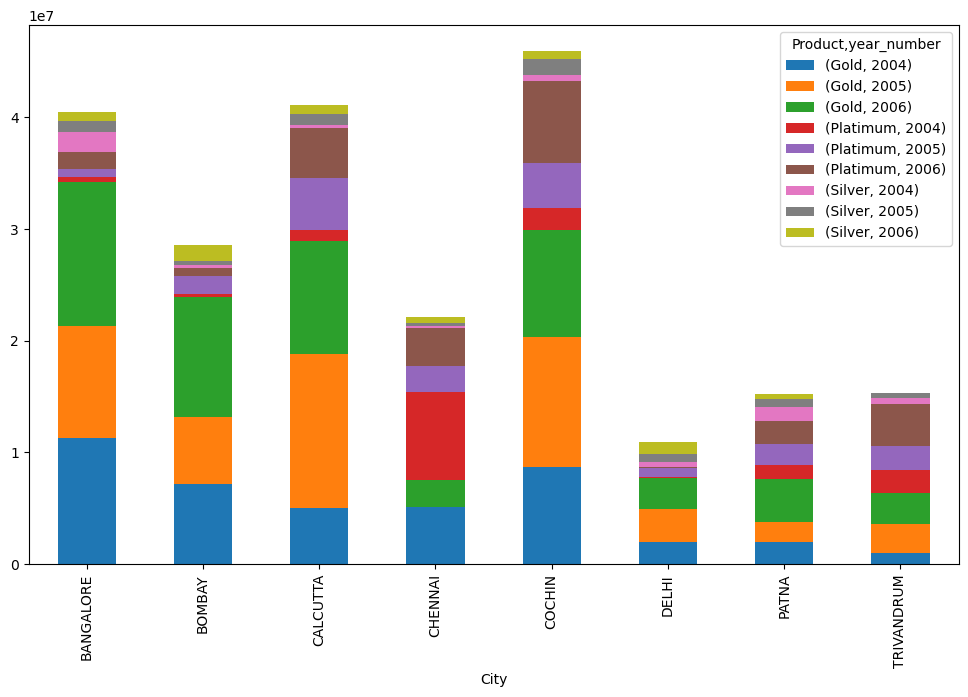

In [37]:
City_Data=pd.pivot_table(data=df1,index="City",columns=['Product','year_number'],values='Amount',aggfunc='sum')
City_Data.plot(kind='bar',figsize = (12,7),stacked=True)
plt.show()

### Q4. Create graphs for

### a. Monthly comparison of total spends, city wise

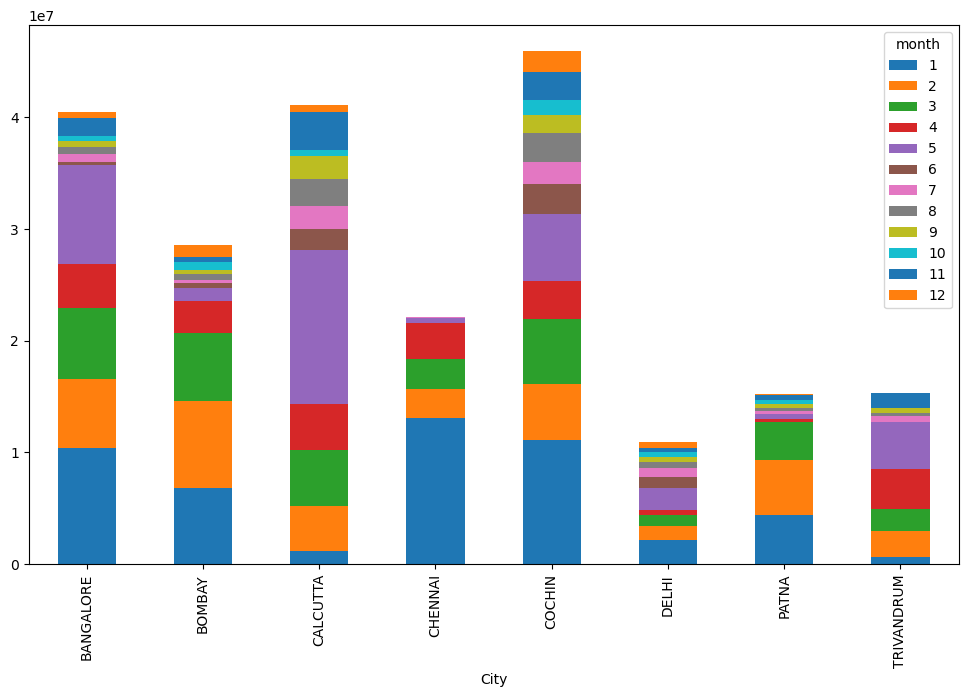

In [36]:
Monthy_Spend=pd.pivot_table(data=df1,index="City",columns=['month'],values='Amount',aggfunc='sum')
Monthy_Spend.plot(kind='bar',figsize = (12,7),stacked=True)
plt.show()

### b. Comparison of yearly spend on air tickets

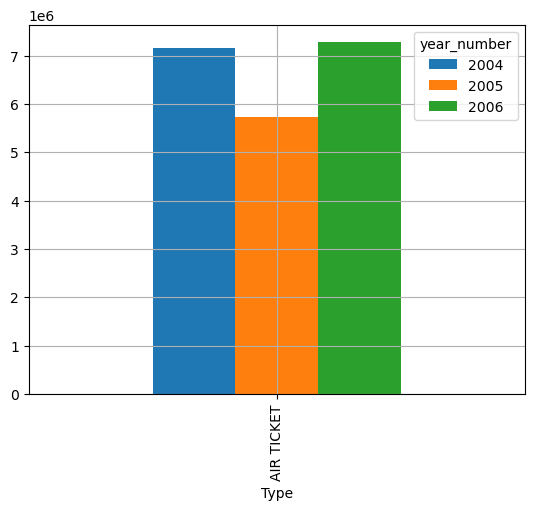

In [39]:
Yearly_Spend=pd.pivot_table(data=df1[df1.Type=='AIR TICKET'],index='Type',columns='year_number',values='Amount',aggfunc='sum')
Yearly_Spend.plot(kind='bar',grid = True)
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonalitythat exists in terms of spend)


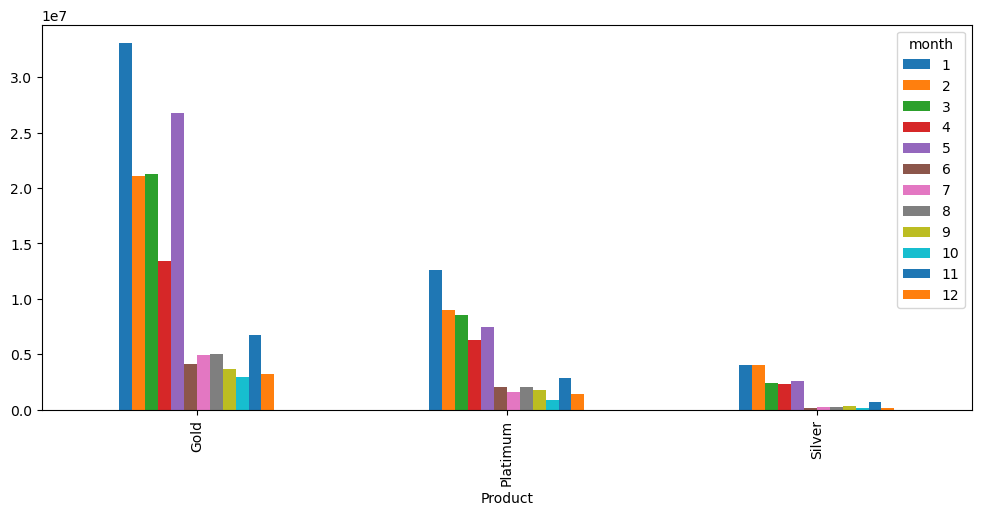

In [43]:
Monthy_Spend_Product=pd.pivot_table(data=df1,index='Product',columns='month',values='Amount',aggfunc='sum')
Monthy_Spend_Product.plot(kind='bar',figsize = (12,5))
plt.show()

### Q5. Write user defined PYTHON function to perform the following analysis:

### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [44]:
def top_customers():
    prod = input("Enter product name : ")
    time = input("Enter year  : ")
    Top_10 = df2.groupby(['Customer','City']).sum().sort_values("Amount",ascending = False).head(10)
    return Top_10  

In [45]:
df2['yearly']=df2.Month.apply(lambda x:x.year)
df2['monthly']=df2.Month.apply(lambda x:x.month)

In [46]:
def top10Customers(product_category,time_period):
    return df2.loc[(df2.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [49]:
product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Gold
Please Enter Time Period and time period should be in yearly/monthly: yearly


In [50]:
top10Customers_Analysis=top10Customers(product_category,time_period)
top10Customers_Analysis

Customer       City Product  yearly      Amount
59      A61     COCHIN    Gold    2005  5896970.18
12      A13  BANGALORE    Gold    2004  5304888.11
47      A43  BANGALORE    Gold    2005  4997374.86
28      A27    CHENNAI    Gold    2004  4835079.79
7       A11     COCHIN    Gold    2005  4824184.18
43      A42     BOMBAY    Gold    2004  4811352.16
11      A12     BOMBAY    Gold    2006  4678713.76
34      A29   CALCUTTA    Gold    2005  4635277.36
62      A62     BOMBAY    Gold    2006  4390704.99
54      A45     COCHIN    Gold    2006  4296684.56